In [ ]:
pip install pandas matplotlib statsmodels

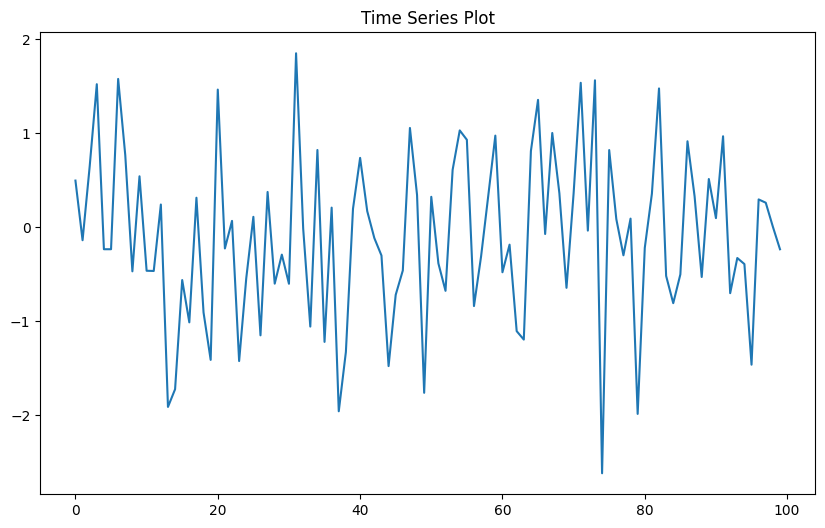

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools importadfuller, kpss

np.random.seed(42)
data = np.random.randn(100)
time_series = pd.Series(data)

plt.figure(figsize=(10,6))
plt.plot(time_series)
plt.title('Time Series Plot')
plt.show()

In [ ]:
def adf_test(time_series):
    result = adfuller(time_series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The time series is stationary (reject null hypothesis).")
    else:
        print("The time series is non-stationary (fail to reject null hypothesis).")

adf_test(time_series)

ADF Statistic: -10.084425913669714
p-value: 1.1655044784188669e-17
The time series is stationary (reject null hypothesis).


In [ ]:
def kpss_test(time_series):
    result = kpss(time_series, regression='c', nlags="auto")
    print("KPSS Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The time series is non-stationary (reject null hypothesis).")
    else:
        print("The time series is stationary (fail to reject null hypothesis).")

kpss_test(time_series)

KPSS Statistic: 0.12349458192862009
p-value: 0.1
The time series is stationary (fail to reject null hypothesis).


<ipython-input-9-c1b2f58c6e7a>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(time_series, regression='c', nlags="auto")


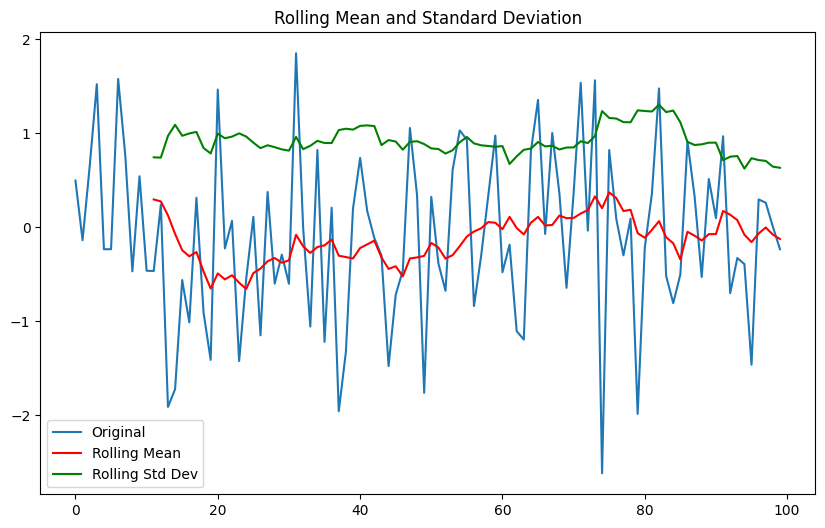

In [ ]:
def plot_rolling_statistics(time_series, window=12):
    rolling_mean = time_series.rolling(window=window).mean()
    rolling_std = time_series.rolling(window=window).std()

    plt.figure(figsize=(10,6))
    plt.plot(time_series, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std Dev', color='green')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

plot_rolling_statistics(time_series)

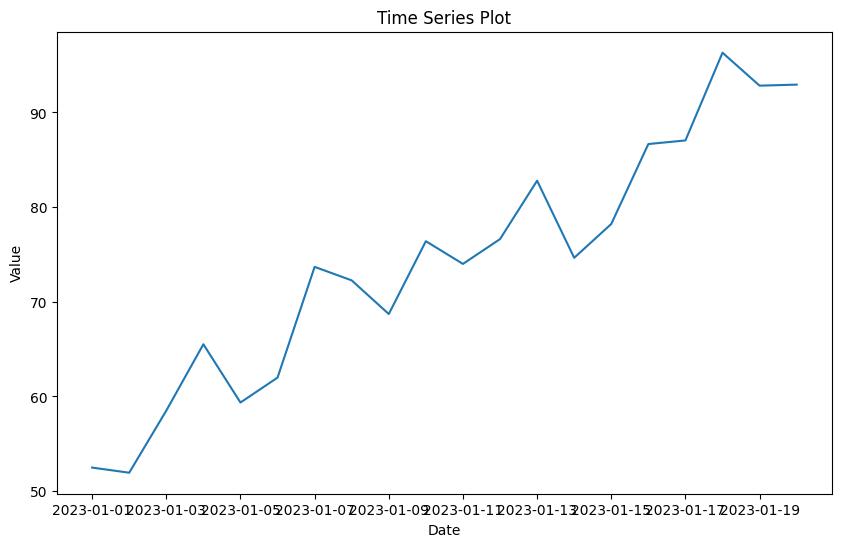

ADF Test on Original Series:
ADF Statistic: 0.0548039461779147
p-value: 0.9628363921597565
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
The series is non-stationary.


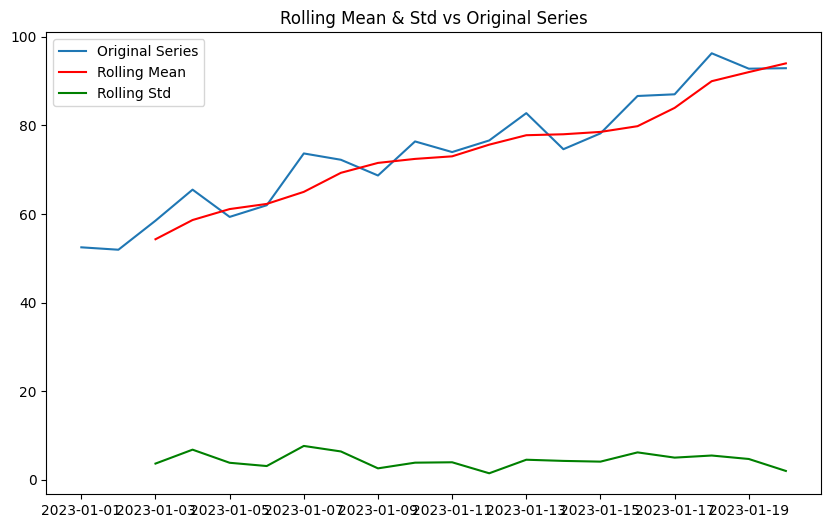

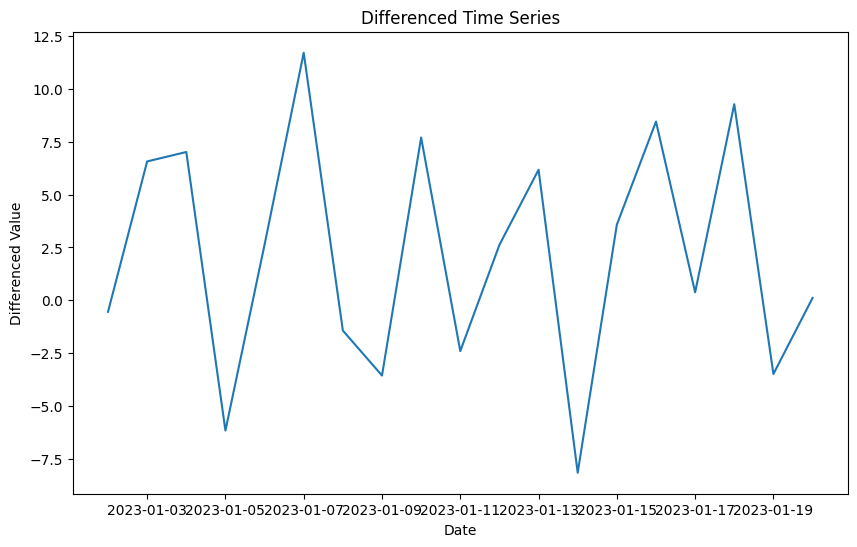

ADF Test on Differenced Series:
ADF Statistic: -3.4306154666094426
p-value: 0.0099584292955411
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
The series is stationary.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools importadfuller

def generate_sample_data(n_points=20):
    """Generates a sample time series data."""
    np.random.seed(42)  # For reproducibility
    dates = pd.date_range(start='2023-01-01', periods=n_points, freq='D')
    # Generate a time series with a simple linear trend plus some random noise
    trend = np.linspace(50, 100, n_points)  # Linear trend from 50 to 100
    noise = np.random.normal(0, 5, n_points)  # Add some noise with mean=0 and std=5
    values = trend + noise
    data = pd.DataFrame({'date': dates, 'value': values})
    data.set_index('date', inplace=True)
    return data

def adf_test(series):
    """Performs the Augmented Dickey-Fuller test to check stationarity."""
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

def plot_time_series(data):
    """Plots the time series data."""
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

def plot_rolling_statistics(data, window=12):
    """Plots rolling mean and rolling standard deviation of the time series."""
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()

    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original Series')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Std vs Original Series')
    plt.legend(loc='best')
    plt.show()

def differencing(data):
    """Applies differencing to the time series to make it stationary."""
    return data.diff().dropna()

def main():
    # Generate sample time series data with 20 data points
    data = generate_sample_data(n_points=20)

    # Visual Inspection (Plot the Time Series)
    plot_time_series(data['value'])

    # Perform Augmented Dickey-Fuller test
    print("ADF Test on Original Series:")
    adf_test(data['value'])

    # Rolling Statistics (Moving Average and Std)
    plot_rolling_statistics(data['value'], window=3)  # Use a smaller window for 20 data points

    # Differencing the Time Series to Achieve Stationarity
    data_diff = differencing(data['value'])

    # Plot the Differenced Time Series
    plt.figure(figsize=(10, 6))
    plt.plot(data_diff)
    plt.title('Differenced Time Series')
    plt.xlabel('Date')
    plt.ylabel('Differenced Value')
    plt.show()

    # ADF Test on Differenced Series
    print("ADF Test on Differenced Series:")
    adf_test(data_diff)

if __name__ == '__main__':
    main()